System Sizes
[ 7322.  4954. 10671.  7682.  8168. 10112.  8522.  6673.  6923.  7777.
  9657. 10611.  7741.  7071.  6992.  9400.  5782.  6418.  7918.  4952.
  6477.  6189.  8575. 10688.  6224.  7502.  9281.  7427.  7822.  8133.
  8080.  8945.  9669.  8230.  7086.  8592. 10381. 11304.  6380.  8267.
 10694.  8343.  5541.  7833.  6817. 10930.  9314.  7301.  9832.  6883.
  5988.  7912.  9026.  8233.  7915.  9632.  7281.  6790. 11195.  6946.]

Lead to close results
[0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07 0.07]

Cancel rate results
[0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275
 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275
 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.275 0.2

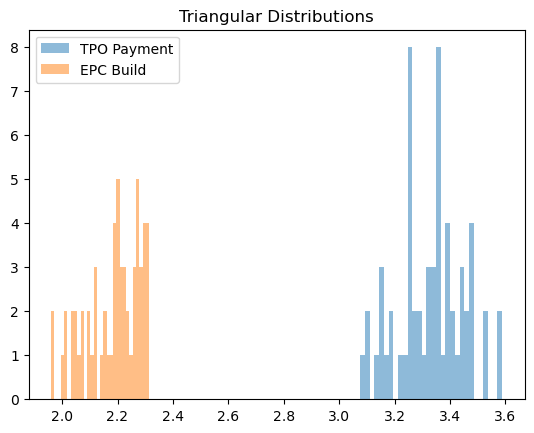

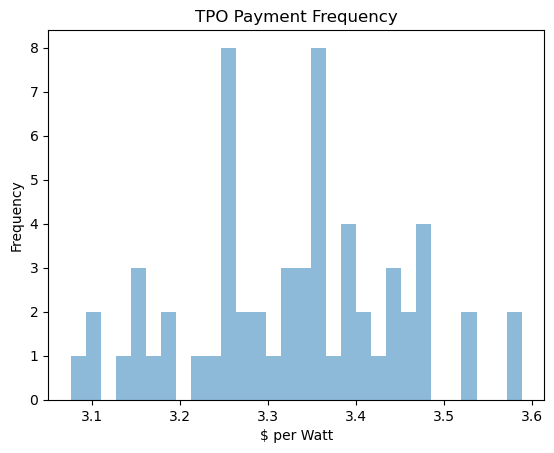

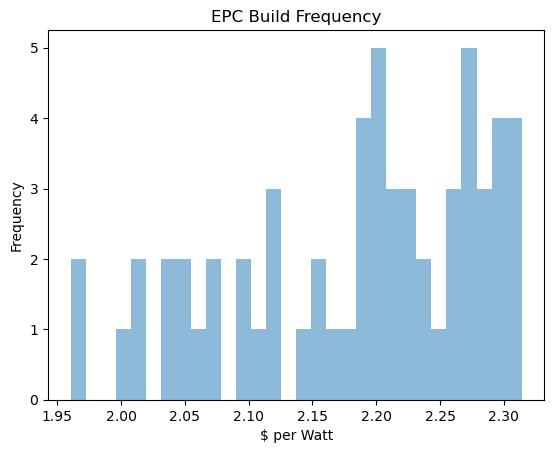

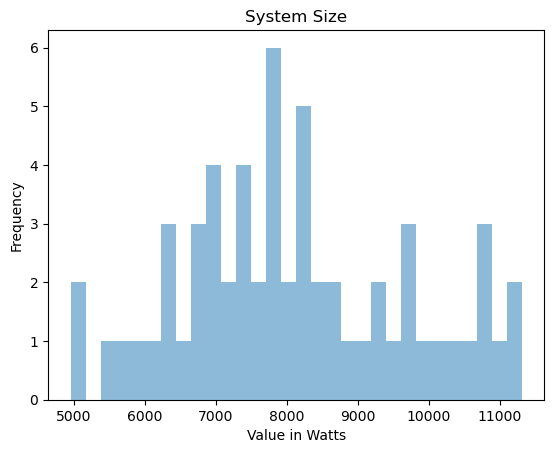

     Date Revenue NTP Revenue MC Revenue ATO Gross Revenue  \
0   01-25           0          0           0             0   
1   02-25           0          0           0             0   
2   03-25           0          0           0             0   
3   04-25           0          0           0             0   
4   05-25           0          0           0             0   
5   06-25           0          0           0             0   
6   07-25           0          0           0             0   
7   08-25       9,425     28,276       9,425        47,126   
8   09-25       9,553     28,659       9,553        47,765   
9   10-25      34,200    102,600      34,200       170,999   
10  11-25      54,085    162,256      54,085       270,426   
11  12-25      66,109    198,327      66,109       330,544   
12  01-26      40,231    120,694      40,231       201,157   
13  02-26      91,576    274,728      91,576       457,880   
14  03-26      62,366    187,099      62,366       311,832   
15  04-2

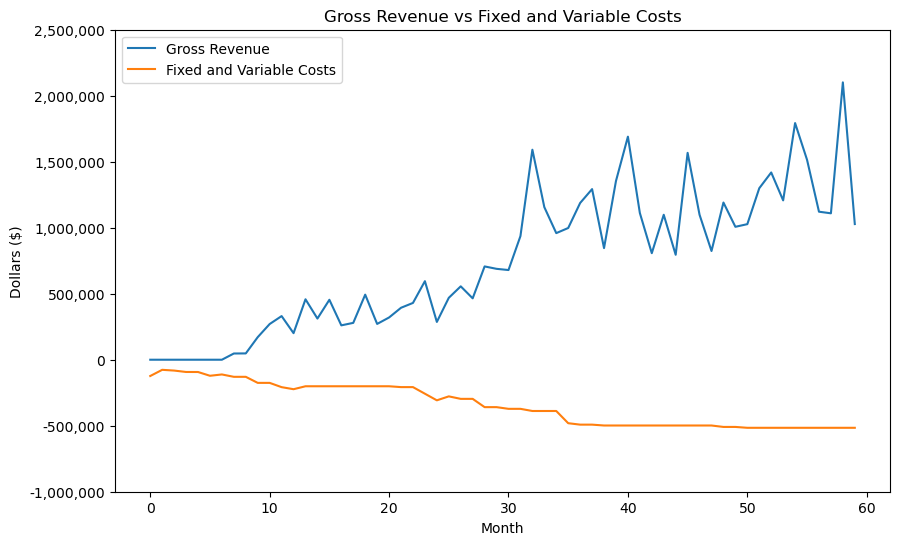

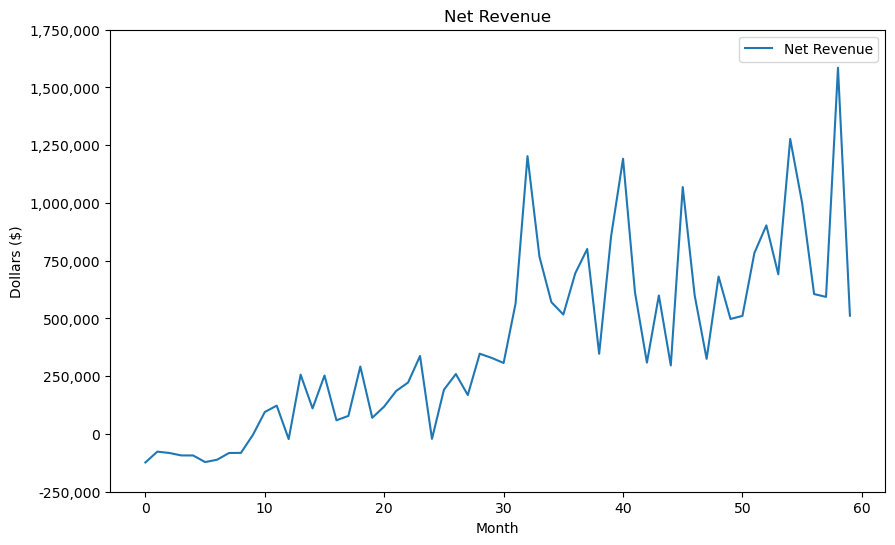

In [1]:
# Monte Carlo Simulation to quantify the effects of random variables and stress test the potential financial results of a residential solar developer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from openpyxl import load_workbook

np.set_printoptions(precision=3)

#define constants

#Payment Milestones as a % (sum to 100%)
ntp_payment = 0.2   # Notice to proceed 
mc_payment = 0.6    # mechanical completion
ato_payment = 0.2   # authorization to operate 


#Account for Revenue Delay from Sales through subsequent milestones
ntp_forecast_months = 1.3
mc_forecast_months = 1.4
ato_forecast_months = 1.7

# Import data from Excel
file_path = 'C:/Users/mauli/OneDrive/New Columbia Solar/Consulting/Resi Financial Model MC R2_Standard Output.xlsx'
#file_path = 'C:/Users/mauli/OneDrive/New Columbia Solar/Consulting/Resi Financial Model MC R2.xlsx'
sheet_name = 'Assumptions'

# Load the workbook with data only
wb = load_workbook(file_path, data_only=True)
ws = wb[sheet_name]

# Assumptions for Staffing. Intended to be static.
headcount_data = [cell.value for cell in ws['C56:BJ56'][0]]
net_new_heads_data = [cell.value for cell in ws['C57:BJ57'][0]]
net_new_sales_reps_data = [cell.value for cell in ws['C58:BJ58'][0]]
active_sales_reps_data = [cell.value for cell in ws['C59:BJ59'][0]]

#Conversion Rate Assumptions
#lead_to_close_data = [cell.value for cell in ws['C62:BJ62'][0]] replace with Triangular distribution
close_to_install_data = [cell.value for cell in ws['C63:BJ63'][0]]
lead_to_install_data = [cell.value for cell in ws['C64:BJ64'][0]]
#cancel_rate_data = [cell.value for cell in ws['C65:BJ65'][0]] repalce with Triangular distribution

#Employee and Sales Assumptions
sales_rep_hc_data= [cell.value for cell in ws['C68:BJ68'][0]]
effective_hc_data= [cell.value for cell in ws['C69:BJ69'][0]]
sales_quota_data= [cell.value for cell in ws['C70:BJ70'][0]]
lead_target_data= [cell.value for cell in ws['C71:BJ71'][0]]
sales_count_data= [cell.value for cell in ws['C72:BJ72'][0]]
install_count_data= [cell.value for cell in ws['C73:BJ73'][0]]
total_w_sold_data= [cell.value for cell in ws['C75:BJ75'][0]]
total_w_installed_data= [cell.value for cell in ws['C76:BJ76'][0]]

def convert_to_float(value):
    if value is None:
        return 0 # Handle None values
    else:
        return float(value)

wb.close()

# Convert data to floats with error handling

#Staffing Plan
headcount_data = [convert_to_float(value) for value in headcount_data]
net_new_heads_data = [convert_to_float(value) for value in net_new_heads_data]
net_new_sales_reps_data = [convert_to_float(value) for value in net_new_sales_reps_data]
active_sales_reps_data = [convert_to_float(value) for value in active_sales_reps_data]

#Conversion Rate Assumptions

close_to_install_data = [convert_to_float(value) for value in close_to_install_data]
lead_to_install_data = [convert_to_float(value) for value in lead_to_install_data]


#Employee and Sales Assumptions
sales_rep_hc_data= [convert_to_float(value) for value in sales_rep_hc_data]
effective_hc_data= [convert_to_float(value) for value in effective_hc_data]
sales_quota_data= [convert_to_float(value) for value in sales_quota_data]
lead_target_data= [convert_to_float(value) for value in lead_target_data]
sales_count_data= [convert_to_float(value) for value in sales_count_data]
install_count_data= [convert_to_float(value) for value in install_count_data]
total_w_sold_data= [convert_to_float(value) for value in total_w_sold_data] #in watts
total_w_installed_data= [convert_to_float(value) for value in total_w_installed_data] #in watts

# Create a DataFrame
df = pd.DataFrame({
    'Headcount': headcount_data,
    'Net New Heads': net_new_heads_data,
    'Net New Sales Reps': net_new_sales_reps_data,
    'Active Sales Reps': active_sales_reps_data,
    'Close to Install': close_to_install_data,
    'Lead to Install': lead_to_install_data,
    'Sales Reps': sales_rep_hc_data,
    'Effective HC': effective_hc_data,
    'Sales Quota': sales_quota_data,
    'Lead Target': lead_target_data,
    'Sales Target': sales_count_data,
    'Install Target': install_count_data,
    'Total Sold': total_w_sold_data,
    'Total Installed': total_w_installed_data,

}, index=pd.date_range(start='2025-01-01', periods=60, freq='MS')) 

# Define the parameters for the triangular distributions

system_size_low = 4500 #watts
system_size_mode = 8000 #watts
system_size_high = 12000 #watts

tpo_payment_low = 3.0
tpo_payment_mode = 3.275
tpo_payment_high = 3.60

epc_build_low = 1.95
epc_build_mode = 2.25
epc_build_high = 2.35

#lead_to_close_data replace inputs from static excel to this
lead_to_close_low = 0.0699
lead_to_close_mode =  0.07
lead_to_close_high = 0.0701

#cancel_rate_data replace inputs from static excel to this
cancel_rate_low = .2749
cancel_rate_mode = .275
cancel_rate_high = .2751

# Define the number of simulations for the Monte Carlo method
num_simulations = 5000

# Generate random variables with triangular distributions
tpo_payment = np.random.triangular(tpo_payment_low, tpo_payment_mode, tpo_payment_high, size=60)
epc_build = np.random.triangular(epc_build_low, epc_build_mode, epc_build_high, size=60)
lead_to_close = np.random.triangular(lead_to_close_low, lead_to_close_mode, lead_to_close_high, size=60)
cancel_rate = np.random.triangular(cancel_rate_low,cancel_rate_mode,cancel_rate_high, size=60)
system_size = np.random.triangular(system_size_low, system_size_mode, system_size_high, size=60)

print("System Sizes")
print(np.round(system_size,0))
print()

print("Lead to close results")
print(np.round(lead_to_close, 3))
print()

print("Cancel rate results")
print(np.round(cancel_rate, 3))
print()

#define lead_to_install
lead_to_install = (1-cancel_rate/ lead_to_close)
print("close to install results")
print(np.round(lead_to_install,3))
print()

#calculate Close to Install
close_to_install = lead_to_install / lead_to_close
print("Close to install results")
print(np.round(close_to_install, 3))
print()

#calculate Lead to Install
lead_to_install = (1-cancel_rate)*(lead_to_close) 
print("Lead to Install results")
print(np.round(lead_to_install, 3))
print()

##Incorporate Lag from Sale to ATO for the purposes of quantifying the count
#Create a lag rounding up for the variable ato_forecast_months and shifting the values of the sales_count_data a number of months
ato_forecast_delay_months = round(ato_forecast_months)
delayed_installs_count = np.pad(sales_count_data, (ato_forecast_delay_months,0), mode='constant') #[:ato_forecast_delay_months]

print()
print("Number of values in Sales Count: {}\n".format(len(sales_count_data)))

print("Monthly sales")
print(list(map(int, sales_count_data)))

print()
print("Number of values in Installs: {}\n".format(len(delayed_installs_count)))
print()


#print("Monthly Installs accounting for ATO lag")
#print(delayed_installs_count)

print("Number of values in Installs: {}\n".format(len(delayed_installs_count)))
print(list(map(int, delayed_installs_count)))

# Plot the results
plt.hist(tpo_payment, bins=30, alpha=0.5, label='TPO Payment')
plt.hist(epc_build, bins=30, alpha=0.5, label='EPC Build')
plt.legend()
plt.title('Triangular Distributions')
plt.show()

plt.hist(tpo_payment, bins=30, alpha=0.5, label='TPO Payment')
plt.title('TPO Payment Frequency')
plt.xlabel('$ per Watt')
plt.ylabel('Frequency')
plt.show()

plt.hist(epc_build, bins=30, alpha=0.5, label='EPC Build')
plt.title('EPC Build Frequency')
plt.xlabel('$ per Watt')
plt.ylabel('Frequency')
plt.show()


plt.hist(system_size, bins=30, alpha=0.5, label='System Size')
plt.title('System Size')
plt.xlabel('Value in Watts')
plt.ylabel('Frequency')
plt.show()

# Create empty lists to store the simulation results
revenue_ntp_simulations = []
revenue_mc_simulations = []
revenue_ato_simulations = []
gross_revenue_simulations = []

# Run the Monte Carlo simulation
for i in range(num_simulations):
    revenue_ntp = ntp_payment * (tpo_payment - epc_build) * install_count_data * system_size
    revenue_mc = mc_payment * (tpo_payment - epc_build) * install_count_data * system_size
    revenue_ato = ato_payment * (tpo_payment - epc_build) * install_count_data * system_size
    gross_revenue = revenue_ntp + revenue_mc + revenue_ato  #store gross value from each iteration

    revenue_ntp_simulations.append(revenue_ntp)
    revenue_mc_simulations.append(revenue_mc)
    revenue_ato_simulations.append(revenue_ato)
    gross_revenue_simulations.append(gross_revenue)

# Calculate mean of simulation results
revenue_ntp_mean = np.mean(revenue_ntp_simulations, axis=0)
revenue_mc_mean = np.mean(revenue_mc_simulations, axis=0)
revenue_ato_mean = np.mean(revenue_ato_simulations, axis=0)
gross_revenue_mean = np.mean(gross_revenue_simulations, axis=0)  # Calculate mean of gross revenue simulation


#import cumulative fixed and variable costs.
#includes Systems & Support + Legal + Business Insurance + Accounting + Marketing + Staffing + all in costs
# Import data from Expenses sheet, cells C86:BJ86

# Import data from Excel
file_path = 'C:/Users/mauli/OneDrive/New Columbia Solar/Consulting/Resi Financial Model MC R2_Standard Output.xlsx'
#file_path = 'C:/Users/mauli/OneDrive/New Columbia Solar/Consulting/Resi Financial Model MC R2.xlsx'
sheet_name = 'Expenses'

# Load the workbook with data only
wb = load_workbook(file_path, data_only=True)
ws = wb[sheet_name]

#Define fixed_and_variable_costs
fixed_and_variable_costs = [cell.value for cell in ws['C86:BJ86'][0]]

(wb.close())

# Create a DataFrame with fixed_and_variable_costs
fixed_and_variable_costs_df = pd.DataFrame({
    'Fixed and Variable Costs': fixed_and_variable_costs
}, index=pd.date_range(start='2025-01-01', periods=60, freq='MS')) # Set the index to match simulation_results

# Create a DataFrame with the simulation results
simulation_results = pd.DataFrame({
    'Revenue NTP': revenue_ntp_mean,
    'Revenue MC': revenue_mc_mean,
    'Revenue ATO': revenue_ato_mean,
    'Gross Revenue': gross_revenue_mean, 
    'Fixed and Variable Costs': fixed_and_variable_costs
}, index=pd.date_range(start='2025-01-01', periods=60, freq='MS'))

# Add commas as thousand separators
simulation_results = simulation_results.apply(lambda x: x.apply(lambda y: '{:,.0f}'.format(y)))

# Change date format to MM-YY and make it a column
simulation_results.reset_index(inplace=True)
simulation_results.rename(columns={'index': 'Date'}, inplace=True)
simulation_results['Date'] = simulation_results['Date'].dt.strftime('%m-%y')

# Set column names
column_names = ['Date', 'Revenue NTP', 'Revenue MC', 'Revenue ATO', 'Gross Revenue', 'Fixed and Variable Costs']
simulation_results.columns = column_names

# Print the formatted DataFrame
print(simulation_results)

#confirm inputs for fixed_and_variable_costs_data
fixed_and_variable_costs_df = pd.DataFrame({
    'Fixed and Variable Costs': fixed_and_variable_costs
}, index=simulation_results.index) #set the index to match simulation_results

# Now you can perform the addition
simulation_results['Net Revenue'] = simulation_results['Gross Revenue'].apply(lambda x: float(x.replace(',', ''))) + fixed_and_variable_costs_df['Fixed and Variable Costs']

# Create a DataFrame for 'Net Revenue'
print()
print("Preview Monthly Net Revenue Results")
print()
net_revenue_df_display = pd.DataFrame({
     'Net Revenue': simulation_results['Net Revenue'].apply(lambda x: '{:,.0f}'.format(x))
}, index=simulation_results.index)

print(net_revenue_df_display)
print()


# Plot Gross Revenue vs Fixed and Variable Costs
## Have to remove the commas to display charts correctly

plt.figure(figsize=(10, 6))
plt.plot(simulation_results['Gross Revenue'].apply(lambda x: float(x.replace(',', ''))), label='Gross Revenue')
plt.plot(simulation_results['Fixed and Variable Costs'].apply(lambda x: float(x.replace(',', ''))), label='Fixed and Variable Costs')
plt.title('Gross Revenue vs Fixed and Variable Costs')
plt.xlabel('Month')
plt.ylabel('Dollars ($)')
plt.ylim(-1000000, 2500000)  # Update y-axis limits

# Format y-axis tick labels with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend()
plt.show()

# Plot Net Revenue
plt.figure(figsize=(10, 6))
plt.plot(simulation_results['Net Revenue'], label='Net Revenue')
plt.title('Net Revenue')
plt.xlabel('Month')
plt.ylabel('Dollars ($)')
plt.ylim(-250000, 1750000)  # Update y-axis limits

# Format y-axis tick labels with commas and integers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend()
plt.show()